## Importing all necessary libraries

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import cv2
import glob
from skimage import io
from skimage.feature import greycomatrix, greycoprops
from sklearn.model_selection import train_test_split

##Mounting drive to google colab for data

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 

In [76]:
Images = []
Labels = []
path = '/content/drive/MyDrive/Ravelling prediction/dc0b37b92b180fe22db30a074811a599381e4b8882d995e1744227d63873ee80_ravelling_dataset/mod_ravelling_dataset/train/Raveling' 
for filename in os.scandir(path):
  final_path = os.path.join(path, filename)
  image = cv2.imread(final_path, 0)
  Images.append(image)
  Labels.append(1)

path = '/content/drive/MyDrive/Ravelling prediction/dc0b37b92b180fe22db30a074811a599381e4b8882d995e1744227d63873ee80_ravelling_dataset/mod_ravelling_dataset/train/Non_raveling' 

for filename in os.scandir(path):
  final_path = os.path.join(path, filename)
  image = cv2.imread(final_path, 0)
  Images.append(image)
  Labels.append(0)

Images = np.array(Images)
Labels = np.array(Labels)




In [77]:
categories = ['Non_raveling','Raveling']

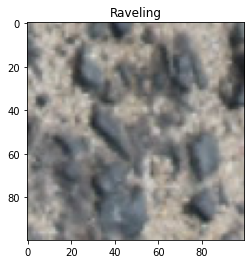

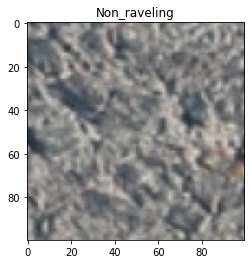

In [78]:
train_path = '/content/drive/MyDrive/Ravelling prediction/dc0b37b92b180fe22db30a074811a599381e4b8882d995e1744227d63873ee80_ravelling_dataset/mod_ravelling_dataset/train' 
categories = ['Raveling','Non_raveling']

for j in range(len(categories)):
  final_path = os.path.join(train_path, categories[j], '*')
  final_path = glob.glob(final_path)
  id = np.random.randint(300)
  img = io.imread(final_path[id])

  figures, axes = plt.subplots()
  axes.set_title(categories[j])
  axes.imshow(img) 

In [79]:
Images.shape

(700, 100, 100)

In [80]:
Labels.shape

(700,)

##Using train test split for splitting data 22% data for testing and rest for training

In [124]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( Images, Labels, test_size=0.1, random_state=42)

In [125]:
x_train.shape

(630, 100, 100)

In [126]:
x_test.shape

(70, 100, 100)

In [127]:

y_train.shape

(630,)

In [128]:
y_test.shape

(70,)

## Function for extracting the features

In [129]:
def extract_features(data):
    data_image = pd.DataFrame()
    for image in range(data.shape[0]): 

        df = pd.DataFrame()  
        img = data[image, :,:]
      
        img_mean = np.mean(img)
        img_std = np.std(img)
        img_skewness = np.mean(abs(img - img.mean()) ** 3)
        img_kurtosis = np.mean(abs(img - img.mean()) ** 4)
        # img_range = max(img) - min(img)


        glcm = greycomatrix(img, [3], [0]) 
        glcm1 = greycomatrix(img, [3], [np.pi/4]) 
        glcm2 = greycomatrix(img, [5], [np.pi/2])
        glcm3 = greycomatrix(img, [3], [3*np.pi/4]) 
        glcm4 = greycomatrix(img, [3], [np.pi/2])
        glcm5 = greycomatrix(img, [1], [2*np.pi/3])
        glcm6 = greycomatrix(img, [4], [2*np.pi/3])
        glcm7 = greycomatrix(img, [5], [2*np.pi/3])
        

        e = greycoprops(glcm, 'energy')[0]
        df['e'] = e
        e1 = greycoprops(glcm1, 'energy')[0]
        df['e1'] = e1
        e2 = greycoprops(glcm2, 'energy')[0]
        df['e2'] = e2
        e3 = greycoprops(glcm3, 'energy')[0]
        df['e3'] = e3
        e4 = greycoprops(glcm4, 'energy')[0]
        df['e4'] = e4
        e5 = greycoprops(glcm5, 'energy')[0]
        df['e5'] = e5
        e6 = greycoprops(glcm6, 'energy')[0]
        df['e6'] = e6
        e7 = greycoprops(glcm7, 'energy')[0]
        df['e7'] = e7


        corr = greycoprops(glcm, 'correlation')[0]
        df['corr'] = corr   
        corr1 = greycoprops(glcm1, 'correlation')[0]
        df['corr1'] = corr1 
        corr2 = greycoprops(glcm2, 'correlation')[0]
        df['corr2'] = corr2          
        corr3 = greycoprops(glcm3, 'correlation')[0]
        df['corr3'] = corr3 
        corr4 = greycoprops(glcm4, 'correlation')[0]
        df['corr4'] = corr4 
        corr5 = greycoprops(glcm5, 'correlation')[0]
        df['corr5'] = corr5 
        corr6 = greycoprops(glcm6, 'correlation')[0]
        df['corr6'] = corr6
        corr7 = greycoprops(glcm7, 'correlation')[0]
        df['corr7'] = corr7 


        homo = greycoprops(glcm, 'homogeneity')[0]
        df['homo'] = homo     
        homo1 = greycoprops(glcm1, 'homogeneity')[0]
        df['homo1'] = homo1 
        homo2 = greycoprops(glcm2, 'homogeneity')[0]
        df['homo2'] = homo2  
        homo3 = greycoprops(glcm3, 'homogeneity')[0]
        df['homo3'] = homo3  
        homo4 = greycoprops(glcm4, 'homogeneity')[0]
        df['homo4'] = homo4  
        homo5 = greycoprops(glcm5, 'homogeneity')[0]
        df['homo5'] = homo5   
        homo6 = greycoprops(glcm6, 'homogeneity')[0]
        df['homo6'] = homo6
        homo7 = greycoprops(glcm7, 'homogeneity')[0]
        df['homo7'] = homo7                


        contrast = greycoprops(glcm, 'contrast')[0]
        df['contrast'] = contrast
        contrast1 = greycoprops(glcm1, 'contrast')[0]
        df['Contrast1'] = contrast1
        contrast2 = greycoprops(glcm2, 'contrast')[0]
        df['Contrast2'] = contrast2
        contrast3 = greycoprops(glcm3, 'contrast')[0]
        df['Contrast3'] = contrast3              
        contrast4 = greycoprops(glcm4, 'contrast')[0]
        df['Contrast4'] = contrast4 
        contrast5 = greycoprops(glcm5, 'contrast')[0]
        df['Contrast5'] = contrast5
        contrast6 = greycoprops(glcm6, 'contrast')[0]
        df['Contrast6'] = contrast6
        contrast7 = greycoprops(glcm7, 'contrast')[0]
        df['Contrast7'] = contrast7         



        df['mean'] = img_mean
        df['std'] = img_std
        df['skewness'] = img_skewness
        df['kurtosis'] = img_kurtosis
        # df['range'] = img_range
        # moment = 


  
        data_image = data_image.append(df)
        
    return data_image

In [130]:
x_train = extract_features(x_train)

In [131]:
x_test = extract_features(x_test)

##Standardizing the training testing data

In [136]:
import tensorflow as tf
from sklearn import preprocessing
# scaler = preprocessing.StandardScaler()
# features = extract_features(x_train)
# scaler.fit(features)
# test_features = extract_features(x_test)
# X_train_standard = scaler.transform(features)
# x_test_standard = scaler.transform(test_features)

In [137]:
# Checking shape of standardized train test set
# print(X_train_standard.shape)
# print(x_test_standard.shape)

In [138]:
x_train.shape

(630, 36)

In [139]:
len(y_train)

630

##Training the model

In [152]:
classifier = tf.keras.models.Sequential()
classifier.add(tf.keras.layers.BatchNormalization())
classifier.add(tf.keras.layers.Dense(units=256,activation="ReLU"))
classifier.add(tf.keras.layers.Dropout(0.3))
classifier.add(tf.keras.layers.BatchNormalization())
classifier.add(tf.keras.layers.Dense(units=128,activation="ReLU"))
classifier.add(tf.keras.layers.Dropout(0.2))
classifier.add(tf.keras.layers.BatchNormalization())
classifier.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
classifier.compile(optimizer=adam,loss="binary_crossentropy",metrics=['accuracy'])
classifier.fit(x_train,y_train,batch_size = 64,epochs = 1500)

Epoch 1/1500
10/10 [==============================] - 1s 5ms/step - loss: 0.5916 - accuracy: 0.7175
Epoch 2/1500
10/10 [==============================] - 0s 5ms/step - loss: 0.4379 - accuracy: 0.8143
Epoch 3/1500
10/10 [==============================] - 0s 5ms/step - loss: 0.3815 - accuracy: 0.8238
Epoch 4/1500
10/10 [==============================] - 0s 4ms/step - loss: 0.3612 - accuracy: 0.8333
Epoch 5/1500
10/10 [==============================] - 0s 6ms/step - loss: 0.3629 - accuracy: 0.8444
Epoch 6/1500
10/10 [==============================] - 0s 4ms/step - loss: 0.3418 - accuracy: 0.8381
Epoch 7/1500
10/10 [==============================] - 0s 5ms/step - loss: 0.3318 - accuracy: 0.8540
Epoch 8/1500
10/10 [==============================] - 0s 6ms/step - loss: 0.3111 - accuracy: 0.8556
Epoch 9/1500
10/10 [==============================] - 0s 5ms/step - loss: 0.3167 - accuracy: 0.8571
Epoch 10/1500
10/10 [==============================] - 0s 4ms/step - loss: 0.2935 - accuracy: 0.8667

##Calculating accuracy score using sklearn

In [153]:
from sklearn.metrics import accuracy_score
pred = classifier.predict(x_test)
print(classifier.evaluate(x_test, y_test))

3/3 [==============================] - 0s 5ms/step - loss: 0.0876 - accuracy: 0.9714
[0.08755797892808914, 0.9714285731315613]


## Testing on rest images

In [154]:
test_images = []
directory = '/content/drive/MyDrive/Ravelling prediction/dc0b37b92b180fe22db30a074811a599381e4b8882d995e1744227d63873ee80_ravelling_dataset/mod_ravelling_dataset/test' 
for filename in os.scandir(directory):
  f = os.path.join(directory, filename)
  image = cv2.imread(f, 0)

  feature_f = extract_features(np.array(image).reshape(1,100,100))
 
  prediction = classifier.predict(feature_f)
  
  if(prediction > 0.5):
      class_name = 'Raveling'
  
  else:
      class_name = 'Non_raveling'
  

  test_images.append(
      {
          'filename': '' + os.path.basename(filename) + '',
          'class': class_name
      }
  )




In [155]:
final_df = pd.DataFrame(test_images)
res = final_df.to_csv('art_3.csv')